### What is the objective of this project? 

The objective for this project is to explore the LIHTC dataset, get a better understanding of the program, and build a regressor to predict what the allocated amount for a project ought to be based off of various features in the dataset.

We also might build a classifier to determine if a particular project qualifies for certain binary criteria. This depends on the quality of the data.



### How should the problem be framed? 

We should use a regression algorithm as we are looking to predict whether amount allocated to a particular area.

![lihtc](https://camo.githubusercontent.com/af8ed0a0f65baaa8c90afabbd29e8b1fbc19b48fcf63b86028d5143a0d22acb9/68747470733a2f2f7777772e696864612e6f72672f77702d636f6e74656e742f75706c6f6164732f323031352f30382f494844412d4c6f772d496e636f6d652d5461782d4372656469742d30322d332e6a7067)

# Initialize Packages

In [808]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load data

In [809]:
pd.set_option('display.max_rows', 20)

In [810]:
pathname = '/Users/blakenicholson/Documents/Personal/Coding/DataAnalysis-LIHTC/LIHTCPUB.CSV'

In [811]:
df = pd.read_csv(pathname, low_memory=False)

In [812]:
df.shape

(49449, 75)

In [813]:
df.columns

Index(['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'latitude', 'longitude', 'place1990', 'place2000',
       'place2010', 'fips1990', 'fips2000', 'fips2010', 'st2010', 'cnty2010',
       'scattered_site_cd', 'resyndication_cd', 'allocamt', 'n_units',
       'li_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br', 'inc_ceil',
       'low_ceil', 'ceilunit', 'yr_pis', 'yr_alloc', 'non_prof', 'basis',
       'bond', 'mff_ra', 'fmha_514', 'fmha_515', 'fmha_538', 'home',
       'home_amt', 'tcap', 'tcap_amt', 'cdbg', 'cdbg_amt', 'htf', 'htf_amt',
       'fha', 'hopevi', 'hpvi_amt', 'tcep', 'tcep_amt', 'rad', 'qozf',
       'qozf_amt', 'rentassist', 'trgt_pop', 'trgt_fam', 'trgt_eld',
       'trgt_dis', 'trgt_hml', 'trgt_other', 'trgt_spc', 'type', 'credit',
       'n_unitsr', 'li_unitr', 'metro', 'dda', 'qct', 'nonprog', 'nlm_reason',
       'nlm_spc', 'datanote', 'record_stat'],
      dtype='object')

Let's check out the first few rows.

In [814]:
df.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,AKA0000X003,EAGLE RIDGE TOWNHOMES,1775 NORTH THUMA,PALMER,AK,99645,AK-05-23,61.587872,-149.099777,NaN,...,33.0,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,X
1,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,60.125469,-149.446060,NaN,...,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
2,AKA0000X022,"JUNEAU AFFORDABLE RENTALS, LLC",SCATTERED SITE,JUNEAU,AK,99801,AK-99-99,58.383499,-134.437698,NaN,...,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,AKA0000X024,"MILL BAY TOWNHOMES, LLC",1223 MILL BAY ROAD,KODIAK,AK,99615,AK-99-99,57.796478,-152.392319,NaN,...,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
4,AKA0000X030,TURNAGAIN PLACE APTS,2708 COHO WAY,ANCHORAGE,AK,99517,AK-99-99,61.205101,-149.930298,NaN,...,29.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U


In [815]:
df[0:4].T

,0,1,2,3
hud_id,AKA0000X003,AKA0000X018,AKA0000X022,AKA0000X024
project,EAGLE RIDGE TOWNHOMES,"GATEWAY-SEWARD ASSOCIATES, LTD PTN","JUNEAU AFFORDABLE RENTALS, LLC","MILL BAY TOWNHOMES, LLC"
proj_add,1775 NORTH THUMA,1810 PHOENIX ROAD,SCATTERED SITE,1223 MILL BAY ROAD
proj_cty,PALMER,SEWARD,JUNEAU,KODIAK
proj_st,AK,AK,AK,AK
...,...,...,...,...
nonprog,NaN,NaN,NaN,NaN
nlm_reason,NaN,NaN,NaN,NaN
nlm_spc,NaN,NaN,NaN,NaN
datanote,NaN,NaN,NaN,NaN


In [816]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,47036.0,38.240306,4.975487,0.000000,34.811197,39.006252,41.532846,64.851646
longitude,47036.0,-90.888845,16.423087,-166.780594,-96.936663,-86.884270,-78.865175,170.220001
place1990,31804.0,1716.430135,1490.025700,3.000000,680.000000,1305.000000,2495.000000,9070.000000
place2000,38851.0,39167.335152,23037.168723,100.000000,19000.000000,40000.000000,56320.000000,89150.000000
place2010,46949.0,45958.198194,26780.984817,100.000000,23290.000000,47610.000000,64260.000000,99999.000000
...,...,...,...,...,...,...,...,...
metro,48585.0,1.234805,0.535527,0.000000,1.000000,1.000000,1.000000,3.000000
dda,16061.0,0.354399,0.733675,0.000000,0.000000,0.000000,0.000000,4.000000
qct,43671.0,1.788372,0.408467,1.000000,2.000000,2.000000,2.000000,2.000000
nonprog,8460.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49449 entries, 0 to 49448
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hud_id             49449 non-null  object 
 1   project            49448 non-null  object 
 2   proj_add           48465 non-null  object 
 3   proj_cty           49409 non-null  object 
 4   proj_st            49449 non-null  object 
 5   proj_zip           46333 non-null  object 
 6   state_id           48864 non-null  object 
 7   latitude           47036 non-null  float64
 8   longitude          47036 non-null  float64
 9   place1990          31804 non-null  float64
 10  place2000          38851 non-null  float64
 11  place2010          46949 non-null  float64
 12  fips1990           49449 non-null  object 
 13  fips2000           49449 non-null  object 
 14  fips2010           49449 non-null  object 
 15  st2010             49449 non-null  int64  
 16  cnty2010           470

# Data Exploration

- Variable Identification
- Univariate Analysis
- Bi-variate Analysis
- Missing values treatment
- Outlier treatment
- Variable transformation
- Variable creation

# Data Cleaning

using data dictionary found here: https://github.com/bnicholson206/DataAnalysis-LIHTC/blob/main/LIHTC%20Data%20Dictionary%202019.pdf

We have a fair amount of NaN values in the dataset.

In [818]:
df.isnull().any()

hud_id         False
project         True
proj_add        True
proj_cty        True
proj_st        False
               ...  
nonprog         True
nlm_reason      True
nlm_spc         True
datanote        True
record_stat    False
Length: 75, dtype: bool

First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

Predictors = All Columns

Target = Allocamt

Convert all floats to Integers

In [819]:
df_num = df.select_dtypes(include='float')
# df_num.drop(columns=['latitude','longitude'])

In [820]:
df_num.head()

,latitude,longitude,place1990,place2000,place2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,...,trgt_other,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason
0,61.587872,-149.099777,NaN,NaN,58660.0,170.0,NaN,NaN,NaN,33.0,...,NaN,NaN,NaN,33.0,33.0,1.0,NaN,NaN,NaN,NaN
1,60.125469,-149.446060,NaN,NaN,68560.0,122.0,NaN,NaN,NaN,20.0,...,NaN,NaN,1.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN
2,58.383499,-134.437698,NaN,NaN,36400.0,110.0,1.0,2.0,NaN,25.0,...,NaN,1.0,NaN,25.0,25.0,NaN,NaN,NaN,NaN,NaN
3,57.796478,-152.392319,NaN,NaN,40950.0,150.0,NaN,NaN,NaN,20.0,...,NaN,NaN,2.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN
4,61.205101,-149.930298,NaN,NaN,3000.0,20.0,NaN,NaN,NaN,29.0,...,NaN,NaN,2.0,29.0,29.0,NaN,NaN,NaN,NaN,NaN


#### Fill in NaN values

In [821]:
# fill all NaN values and change data type to 'int'

df[df_num.columns] = df[df_num.columns].fillna(0)
df[df_num.columns] = df[df_num.columns].astype('int')

#### Convert all discrete numbers into discrete categories

In [822]:
# convert all discrete numbers into discrete categories

def scattered_site_cd_numttocat(number): # Scattered Sity Property
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def resyndication_cd_numttocat(number): # Resyndicated Property
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Non_Profit_numttocat(number): # Non profit sponsor
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def nonprog_numttocat(number): # Non profit sponsor
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    else:
        return 'No'
    
def Basis_Profit_numttocat(number): # Increase in eligible basis
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Bond_Profit_numttocat(number): # Tax-exempt bond received
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Home_numttocat(number): # HOME Investment Partnership Program Funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Mrr_ra_Profit_numttocat(number): # HUD Multi-Family financial/rental assistance
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_514_numttocat(number): # FmHA (RHS) Section 514 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_515_numttocat(number): # FmHA (RHS) Section 515 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_538_numttocat(number): # FmHA (RHS) Section 515 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def rad_numttocat(number): # Housing Trust Fund funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def htf_numttocat(number): # Housing Trust Fund funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def hopevi_numttocat(number): # Forms part of a HOPEVI development
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def tcep_numttocat(number): # Tax Credit Exchange Program (TCEP) funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def tcap_numttocat(number): # Tax Credit Assistance Program (TCEP) funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fha_numttocat(number): #FHA-insured loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def cdbg_numttocat(number): # community development block grant (CDBG) funds
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def inc_ceil_numttocat(number): #Elected Rent/income ceiling for low income units
    if number is 1:
        return '50% AMGI'
    elif number is 2:
        return '60% AMGI'
    elif number is 3:
        return 'Not Reported'
    
def Low_ceil_numttocat(number): # Units set aside with rents lower than elected rent/income ceiling
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def record_stat_numttocat(number): # Units set aside with rents lower than elected rent/income ceiling
    if number is 'N':
        return 'New'
    elif number is 'U':
        return 'Updated'
    elif number is 'X':
        return 'Existing'
    
def Rentassist_stat_numttocat(number): # Federal or state project-based rental assistance contract
    if number is 1:
        return 'Federal'
    elif number is 2:
        return 'State'
    elif number is 3:
        return 'Both State and Federal'
    elif number is 4:
        return 'Neither'
    elif number is 5:
        return 'Unknown'
    
def Type_numttocat(number): # Federal or state project-based rental assistance contract
    if number is 1:
        return 'New Construction'
    elif number is 2:
        return 'Acquisition and Rehab'
    elif number is 3:
        return 'Both new construction and A/R'
    elif number is 4:
        return 'Existing'
    
def Credit_numttocat(number): # Type of credit percentage
    if number is 1:
        return '30% present value'
    elif number is 2:
        return '70% present value'
    elif number is 3:
        return 'Both'
    elif number is 4:
        return 'TCEP Only'
    
def dda_numttocat(number): # Is the census tract in a difficult development area?
    if number is 0:
        return 'Not in DDA'
    elif number is 1:
        return 'In Metro DDA'
    elif number is 2:
        return 'In Non-Metro DDA'
    elif number is 3:
        return 'In Metro GO Zone DDA'
    elif number is 4:
        return 'In Non-Metro GO Zone DDA'
    
def metro_numttocat(number): # Is the census tract metro or non-metro at the time the property was placed into service?
    if number is 1:
        return 'Metro/Non-Central City'
    elif number is 2:
        return 'Metro/Central City'
    elif number is 3:
        return 'Non-Metro'
    
def nlm_reason_numttocat(number): # Reason property is no longer monitored for LIHTC
    if number is 1:
        return 'Completed Extended-Use Period'
    elif number is 2:
        return 'Sale under Qualified Contract'
    elif number is 3:
        return 'Other'
    
def qct_numttocat(number): # Is the census tract a qualified census tract?
    if number is 1:
        return 'In a Qualified Census Tract'
    elif number is 2:
        return 'Not In a Qualified Census Tract'
    
def qozf_numttocat(number): # Qualified Opportunity Zone Fund
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_pop_numttocat(number): # Targets a specific population with specified services or facilities
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_fam_numttocat(number): # Targets a specific population - families
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_eld_numttocat(number): # Targets a specific population - elderly
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_dis_numttocat(number): # Targets a specific population - disabled
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_hml_numttocat(number): # Targets a specific population - homeless
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def trgt_other_numttocat(number): # Targets a specific population - other
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'

In [823]:
df["scattered_site_cd"] = df["scattered_site_cd"].map(scattered_site_cd_numttocat)
df["resyndication_cd"] = df["resyndication_cd"].map(resyndication_cd_numttocat)
df["inc_ceil"] = df["inc_ceil"].map(inc_ceil_numttocat)
df["low_ceil"] = df["low_ceil"].map(Low_ceil_numttocat)
df["record_stat"] = df["record_stat"].map(record_stat_numttocat)
df["non_prof"] = df["non_prof"].map(Non_Profit_numttocat)
df["basis"] = df["basis"].map(Basis_Profit_numttocat)
df["bond"] = df["bond"].map(Bond_Profit_numttocat)
df["mff_ra"] = df["mff_ra"].map(Mrr_ra_Profit_numttocat)
df["fmha_514"] = df["fmha_514"].map(fmha_514_numttocat)
df["fmha_515"] = df["fmha_515"].map(fmha_515_numttocat)
df["fmha_538"] = df["fmha_538"].map(fmha_538_numttocat)
df["home"] = df["home"].map(Home_numttocat)
df["rentassist"] = df["rentassist"].map(Rentassist_stat_numttocat)
df["type"] = df["type"].map(Type_numttocat)
df["credit"] = df["credit"].map(Credit_numttocat)
df["dda"] = df["dda"].map(dda_numttocat)
df["metro"] = df["metro"].map(metro_numttocat)
df["nlm_reason"] = df["nlm_reason"].map(nlm_reason_numttocat)
df["tcap"] = df["tcap"].map(tcap_numttocat)
df["cdbg"] = df["cdbg"].map(cdbg_numttocat)
df["htf"] = df["htf"].map(htf_numttocat)
df["hopevi"] = df["hopevi"].map(hopevi_numttocat)
df["fha"] = df["fha"].map(fha_numttocat)
df["tcep"] = df["tcep"].map(tcep_numttocat)
df["rad"] = df["rad"].map(rad_numttocat)
df["nonprog"] = df["nonprog"].map(nonprog_numttocat)
df["qct"] = df["qct"].map(qct_numttocat)
df["qozf"] = df["qozf"].map(qozf_numttocat)
df["trgt_pop"] = df["trgt_pop"].map(trgt_pop_numttocat)
df["trgt_fam"] = df["trgt_fam"].map(trgt_fam_numttocat)
df["trgt_eld"] = df["trgt_eld"].map(trgt_eld_numttocat)
df["trgt_hml"] = df["trgt_hml"].map(trgt_hml_numttocat)
df["trgt_dis"] = df["trgt_dis"].map(trgt_hml_numttocat)
df["trgt_other"] = df["trgt_other"].map(trgt_other_numttocat)

In [824]:
df.to_csv("LIHTCPUB_cleaned.csv", index_label="ID")

In [825]:
df.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,AKA0000X003,EAGLE RIDGE TOWNHOMES,1775 NORTH THUMA,PALMER,AK,99645,AK-05-23,61,-149,0,...,33,33,Metro/Non-Central City,Not in DDA,None,No,None,NaN,NaN,Existing
1,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,60,-149,0,...,20,20,None,Not in DDA,None,No,None,NaN,NaN,Existing
2,AKA0000X022,"JUNEAU AFFORDABLE RENTALS, LLC",SCATTERED SITE,JUNEAU,AK,99801,AK-99-99,58,-134,0,...,25,25,None,Not in DDA,None,No,None,NaN,NaN,Updated
3,AKA0000X024,"MILL BAY TOWNHOMES, LLC",1223 MILL BAY ROAD,KODIAK,AK,99615,AK-99-99,57,-152,0,...,20,20,None,Not in DDA,None,No,None,NaN,NaN,Existing
4,AKA0000X030,TURNAGAIN PLACE APTS,2708 COHO WAY,ANCHORAGE,AK,99517,AK-99-99,61,-149,0,...,29,29,None,Not in DDA,None,No,None,NaN,NaN,Updated


# Feature Engineering

In [826]:
# try:
#   df['ratio_of_li_units'] = df['li_units'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_li_units'] = 0

In [827]:

# try:
#   df['ratio_of_0br_units'] = df['n_0br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_0br_units'] = 0

# try:
#   df['ratio_of_1br_units'] = df['n_1br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_1br_units'] = 0

# try:
#   df['ratio_of_2br_units'] = df['n_2br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_2br_units'] = 0

# try:
#   df['ratio_of_3br_units'] = df['n_3br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_3br_units'] = 0

# try:
#   df['ratio_of_4br_units'] = df['n_4br'] / df['n_units'] 
# except ZeroDivisionError:
#   df['ratio_of_4br_units'] = 0

In [828]:
# df['log_of_n_units'] = np.log(df['n_units'])

# Exploratory Data Analysis

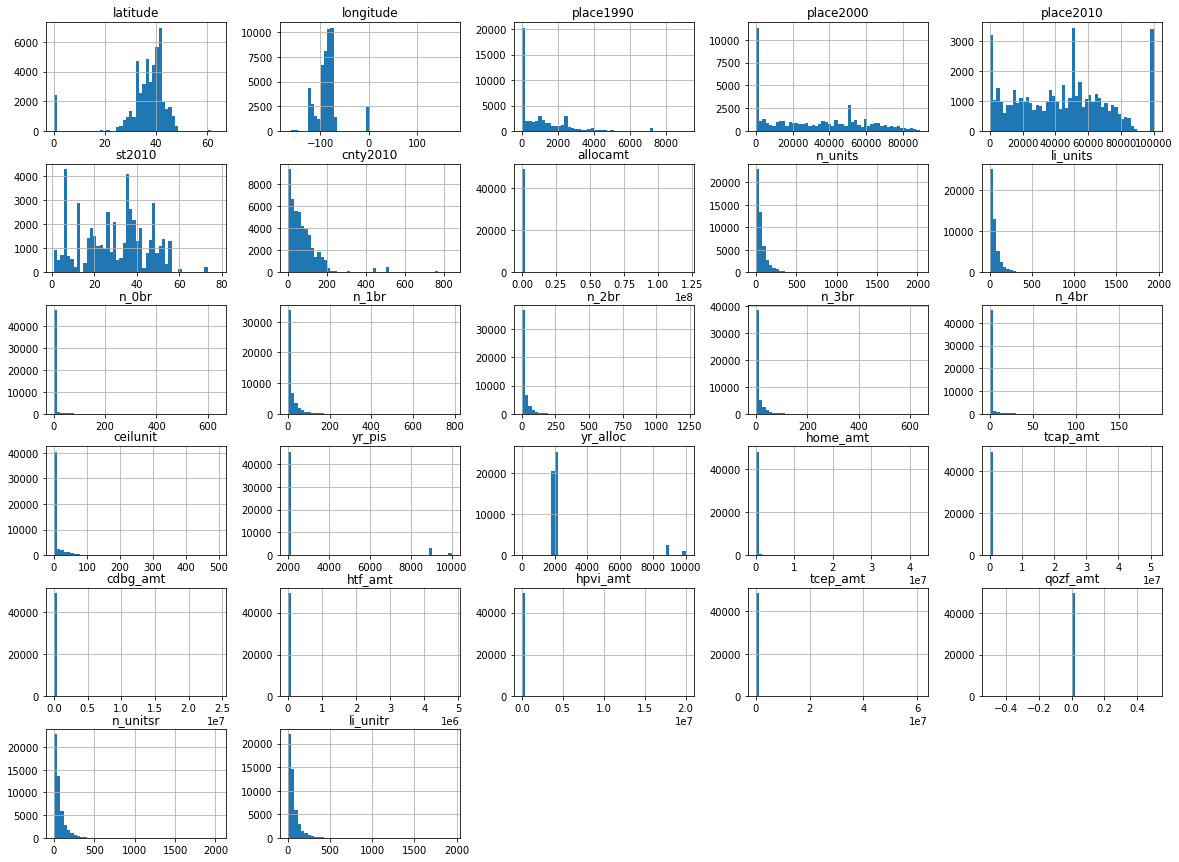

In [829]:
df.hist(bins=50, figsize=(20,15))
plt.show()

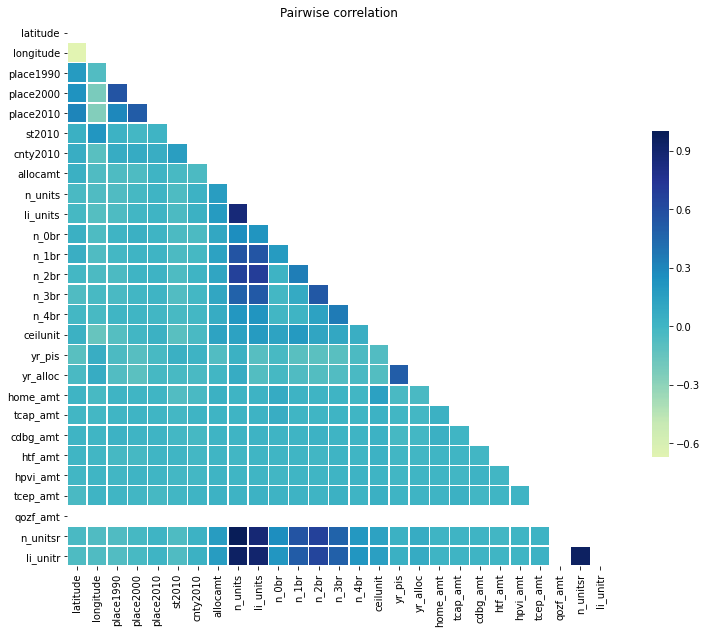

In [830]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
g = sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation')

<AxesSubplot:>

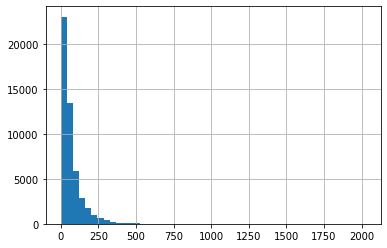

In [831]:
df.n_units.hist(bins=50)

<AxesSubplot:>

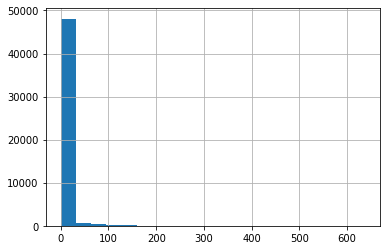

In [832]:
df.n_0br.hist(bins=20)

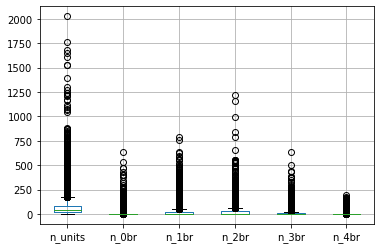

In [833]:
boxplot = df.boxplot(column=['n_units','n_0br','n_1br','n_2br','n_3br','n_4br'])

<Figure size 720x432 with 0 Axes>

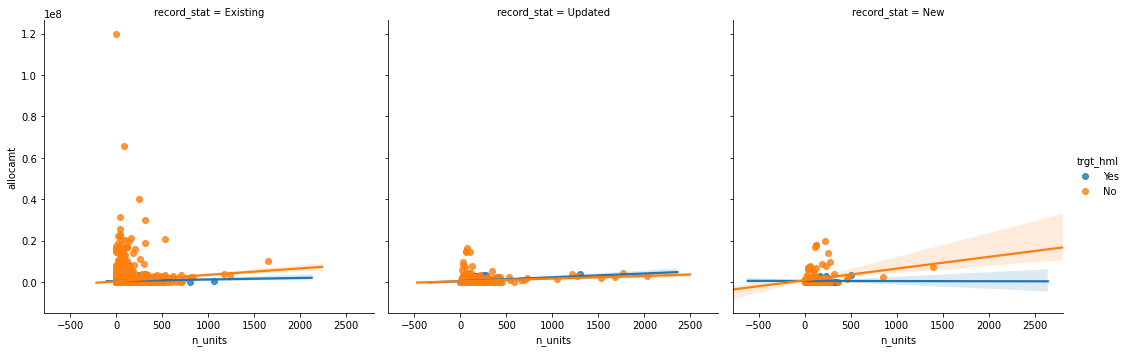

In [834]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='allocamt',x='n_units', hue="trgt_hml",col="record_stat")

plt.show()

<Figure size 720x432 with 0 Axes>

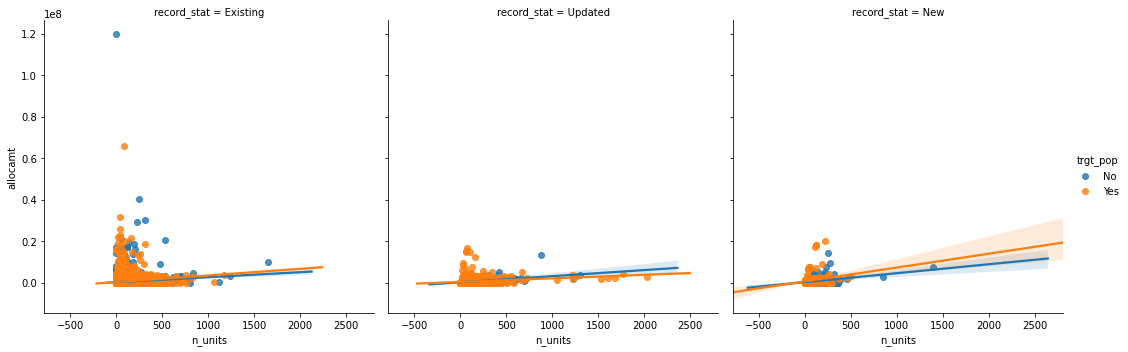

In [835]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='allocamt',x='n_units', hue="trgt_pop",col="record_stat")

plt.show()

<Figure size 720x432 with 0 Axes>

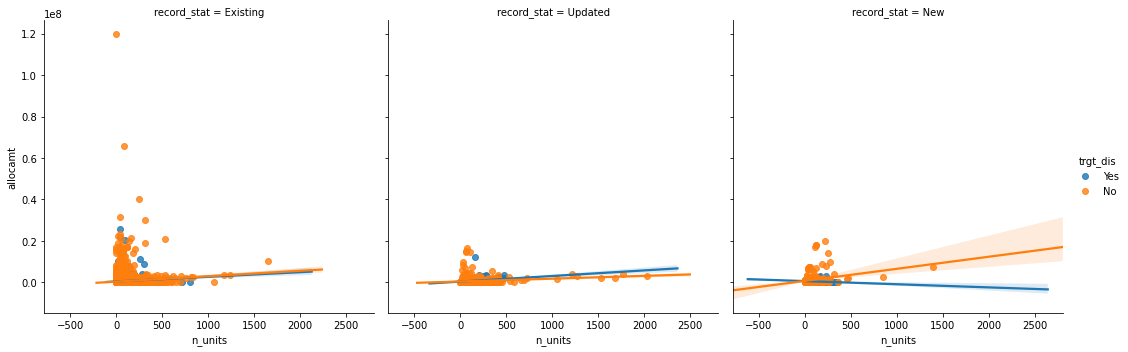

In [836]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, y='allocamt',x='n_units', hue="trgt_dis",col="record_stat")

plt.show()

In [837]:
# add multiple filtering criteria
ts_mask = df.where(df['yr_alloc'] < 3000)
ts_mask = ts_mask.where(df['yr_alloc'] > 1000)

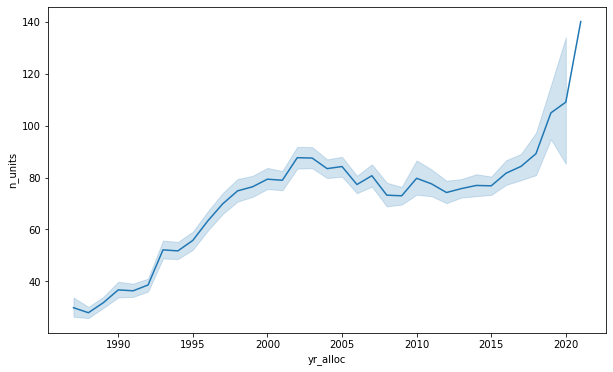

In [838]:
plt.figure(figsize=(10,6))
sns.lineplot(data=ts_mask, x="yr_alloc", y="n_units")

plt.show()